<a href="https://colab.research.google.com/github/saakethk/machine-learning-research/blob/main/Creating_Scalable_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import kagglehub
import pandas as pd

def get_dataset(name: str, data_path: str, delimiter: str):
    # Get data, load into pandas, and return dataframe
    path = kagglehub.dataset_download(name)
    full_path = f"{path}/{data_path}"
    return pd.read_csv(full_path, on_bad_lines='skip', delimiter=delimiter) # The on bad lines just prevents reading corrupted vals

In [100]:
from sklearn.model_selection import train_test_split

def get_dataset_partitioned(name: str, data_path: str, delimiter: str, x_column: str, y_column: str, test_ratio: float, random_state: int):
  # Gets data, splits data
  data = get_dataset(
      name=name,
      data_path=data_path,
      delimiter=delimiter
  )
  data.dropna(subset=[x_column, y_column], inplace=True)
  x_data = data[x_column]
  y_data = data[y_column]
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_ratio, random_state=random_state)
  return (x_train, x_test, y_train, y_test)

In [112]:
import numpy as np

# Gets partitioned data
x_train, x_test, y_train, y_test = get_dataset_partitioned(
    name="aknjit/human-vs-ai-text-classification-dataset",
    data_path="your_dataset_5000.csv",
    delimiter=",",
    x_column="text",
    y_column="label",
    test_ratio=0.5,
    random_state=42
)
print(x_train)
print(y_train)

Using Colab cache for faster access to the 'human-vs-ai-text-classification-dataset' dataset.
1511    The local bakery is known for its delicious so...
1882    We took a scenic drive through the mountains l...
651      Sleep hygiene plays a critical role in recovery.
4930    She prefers reading historical novels over sci...
3089    AI chatbots help businesses improve customer s...
                              ...                        
4426    The concert was canceled due to unexpected wea...
466     Great explorers mapped unknown regions centuri...
3092    He enjoys woodworking in his free time and oft...
3772    The concert was canceled due to unexpected wea...
860     Vegetable consumption lowers risk of chronic d...
Name: text, Length: 2500, dtype: object
1511    0
1882    0
651     1
4930    0
3089    1
       ..
4426    0
466     0
3092    0
3772    0
860     1
Name: label, Length: 2500, dtype: int64


In [116]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

# Creates pipeline
pipe = Pipeline([
        ("tfidf", TfidfVectorizer()),
        ("clf", DecisionTreeClassifier())
    ])

In [117]:
from sklearn import metrics

# Fit model
pipe.fit(x_train, y_train)
predictions = pipe.predict(x_test)
print(predictions)

# Get evaluation metrics
print(metrics.classification_report(y_test, predictions))

[1 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1240
           1       0.98      0.98      0.98      1260

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



[Text(0.8548387096774194, 0.98, 'x[1489] <= 0.083\ngini = 0.5\nsamples = 2500\nvalue = [1260, 1240]'),
 Text(0.7741935483870968, 0.94, 'x[1320] <= 0.145\ngini = 0.416\nsamples = 1605\nvalue = [473, 1132]'),
 Text(0.814516129032258, 0.96, 'True  '),
 Text(0.7419354838709677, 0.9, 'x[1507] <= 0.247\ngini = 0.299\nsamples = 1385\nvalue = [253.0, 1132.0]'),
 Text(0.7096774193548387, 0.86, 'x[984] <= 0.096\ngini = 0.222\nsamples = 1297\nvalue = [165.0, 1132.0]'),
 Text(0.6774193548387096, 0.82, 'x[80] <= 0.163\ngini = 0.186\nsamples = 1263\nvalue = [131, 1132]'),
 Text(0.6451612903225806, 0.78, 'x[928] <= 0.178\ngini = 0.145\nsamples = 1229\nvalue = [97.0, 1132.0]'),
 Text(0.6129032258064516, 0.74, 'x[52] <= 0.189\ngini = 0.118\nsamples = 1208\nvalue = [76, 1132]'),
 Text(0.5806451612903226, 0.7, 'x[714] <= 0.197\ngini = 0.101\nsamples = 1196\nvalue = [64, 1132]'),
 Text(0.5483870967741935, 0.66, 'x[103] <= 0.145\ngini = 0.084\nsamples = 1184\nvalue = [52, 1132]'),
 Text(0.5161290322580645,

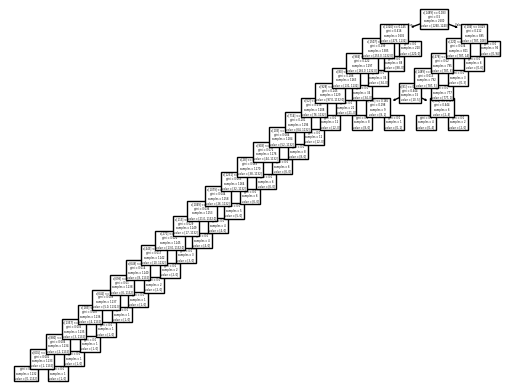

In [119]:
# Visualizing Tree
from sklearn.tree import plot_tree
import graphviz

plot_tree(pipe.named_steps["clf"])


In [124]:
from sklearn.tree import export_text

# Visualizes tree breakpoints
tree_rules = export_text(pipe.named_steps["clf"], feature_names=pipe.named_steps["tfidf"].get_feature_names_out())
print(tree_rules)


|--- the <= 0.08
|   |--- she <= 0.15
|   |   |--- time <= 0.25
|   |   |   |--- my <= 0.10
|   |   |   |   |--- ancient <= 0.16
|   |   |   |   |   |--- medieval <= 0.18
|   |   |   |   |   |   |--- ago <= 0.19
|   |   |   |   |   |   |   |--- historic <= 0.20
|   |   |   |   |   |   |   |   |--- art <= 0.14
|   |   |   |   |   |   |   |   |   |--- manuscripts <= 0.22
|   |   |   |   |   |   |   |   |   |   |--- adapted <= 0.20
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |   |   |--- adapted >  0.20
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- manuscripts >  0.22
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- art >  0.14
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- historic >  0.20
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- ago >  0.19
|   |   |   |   |  